In [1]:
%load_ext autoreload
%autoreload 2

# Imports

In [4]:
import numpy as np 

from DataLoading import load_dataset
from IPython.display import display, HTML
from keras.utils import to_categorical # type: ignore
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from Train import evaluate_model, create_lstm_model, create_cnn_model, create_combined_cnn_lstm_model, create_combined_cnn_lstm_with_attention

# Dataset

In [5]:
X_train, X_test, y_train, y_test = load_dataset()

In [6]:
unique_classes_train = np.unique(y_train)
unique_classes_test = np.unique(y_test)
y_combined_unique = np.concatenate((unique_classes_train, unique_classes_test))

num_classes = len(np.unique(y_combined_unique))
seq_len = 28

print(X_train.shape)
print(y_train.shape)

input_shape = (seq_len, 8, 8, X_train.shape[4])

(7470, 28, 8, 8, 12)
(7470,)


# Random Forest

Accuracy: 0.8657
F1 Score: 0.8573
Precision: 0.8730
Recall: 0.8657


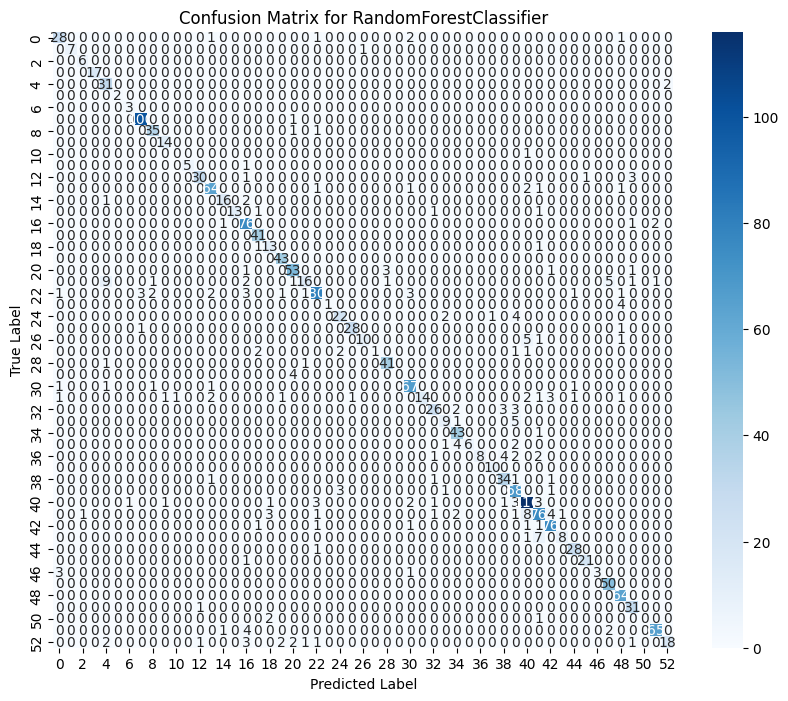

In [8]:
# Flatten Datasets
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

display(HTML("<h1>Evaluating Random Forest Model:</h1>"))
rf_model = RandomForestClassifier(random_state=42)
evaluate_model(rf_model, 'sklearn', X_train_flat, y_train, X_test_flat, y_test)

# CNN

Epoch 1/50


2024-10-07 15:05:29.656701: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4435', 12 bytes spill stores, 12 bytes spill loads

2024-10-07 15:05:29.857392: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4435', 80 bytes spill stores, 80 bytes spill loads

2024-10-07 15:05:30.062855: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4435', 2932 bytes spill stores, 2812 bytes spill loads

2024-10-07 15:05:30.158258: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4435', 536 bytes spill stores, 536 bytes spill loads

2024-10-07 15:05:30.216603: I external/local_xla/xla/s

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 249ms/step - accuracy: 0.0610 - f1_score: 0.0372 - loss: 3.7586
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.3087 - f1_score: 0.2349 - loss: 3.1335
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.4424 - f1_score: 0.3905 - loss: 2.5734
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.5620 - f1_score: 0.5072 - loss: 2.0517
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.6461 - f1_score: 0.6085 - loss: 1.6113
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.7026 - f1_score: 0.6846 - loss: 1.2891
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.7496 - f1_score: 0.7378 - loss: 1.0458
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.7817 - f1_score: 0.7713 - loss: 0.8768
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.8080 - f1_score: 0.7999 - loss: 0.7317
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.8426 - f1_score: 0.8393 - lo

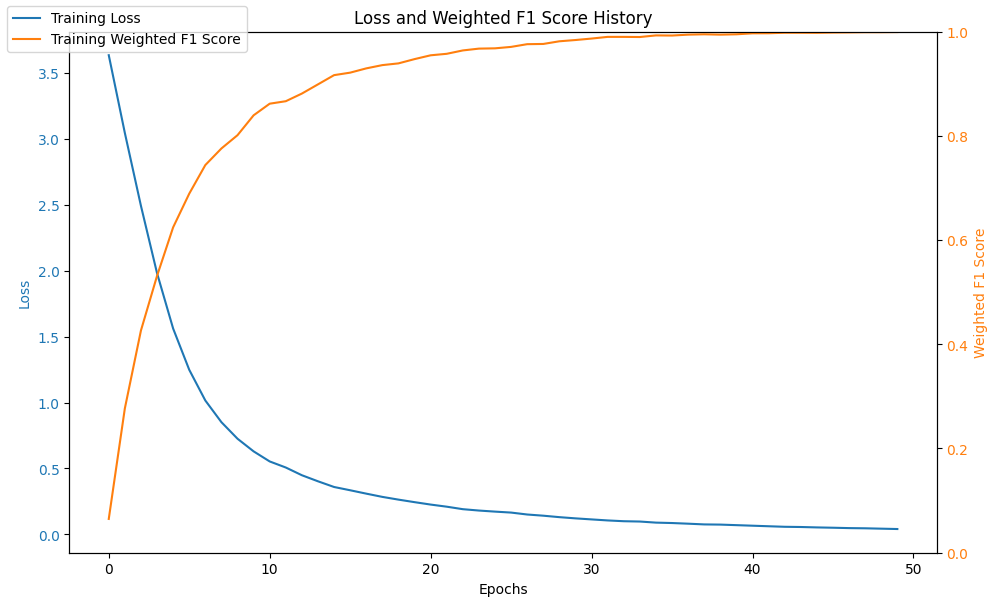

Accuracy: 0.8736
F1 Score: 0.8709
Precision: 0.8781
Recall: 0.8736


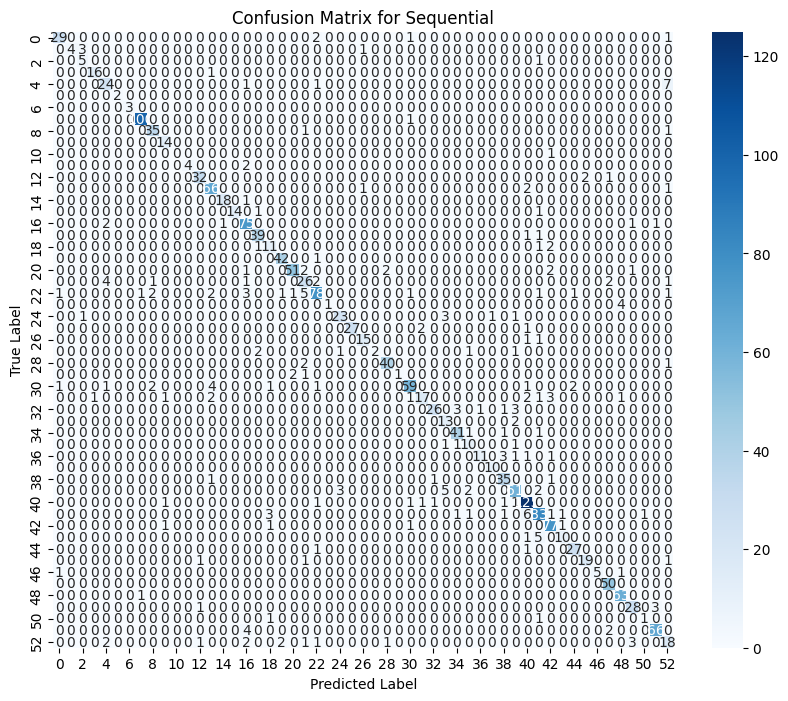

In [11]:
# Encode labels if they are not already encoded
label_encoder = LabelEncoder()
y_train_encoded = to_categorical(label_encoder.fit_transform(y_train))
y_test_encoded = to_categorical(label_encoder.transform(y_test))

# Create CNN model
num_classes = y_train_encoded.shape[1]
model = create_cnn_model((seq_len, 8, 8, 12), num_classes)
fit_params = {
    'epochs': 50,
    'batch_size': 1024
}

# Evaluate the CNN model
display(HTML("<h1>Evaluating CNN Model:</h1>"))
evaluate_model(model=model, 
               model_type='keras',
               X_train=X_train, 
               y_train=y_train_encoded, 
               X_test=X_test, 
               y_test=y_test_encoded, 
               fit_params=fit_params)

# LSTM

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.0743 - f1_score: 0.0343 - loss: 3.8290
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.2089 - f1_score: 0.1407 - loss: 3.1558
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.3543 - f1_score: 0.2684 - loss: 2.4426
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.4867 - f1_score: 0.4217 - loss: 1.9089
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6137 - f1_score: 0.5621 - loss: 1.4915
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6797 - f1_score: 0.6306 - loss: 1.2319
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7343 - f1_score: 0.6953 - loss: 1.0035
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7781 - f1_score: 0.7501 - loss: 0.8446
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7995 - f1_score: 0.7762 - loss: 0.7597
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 

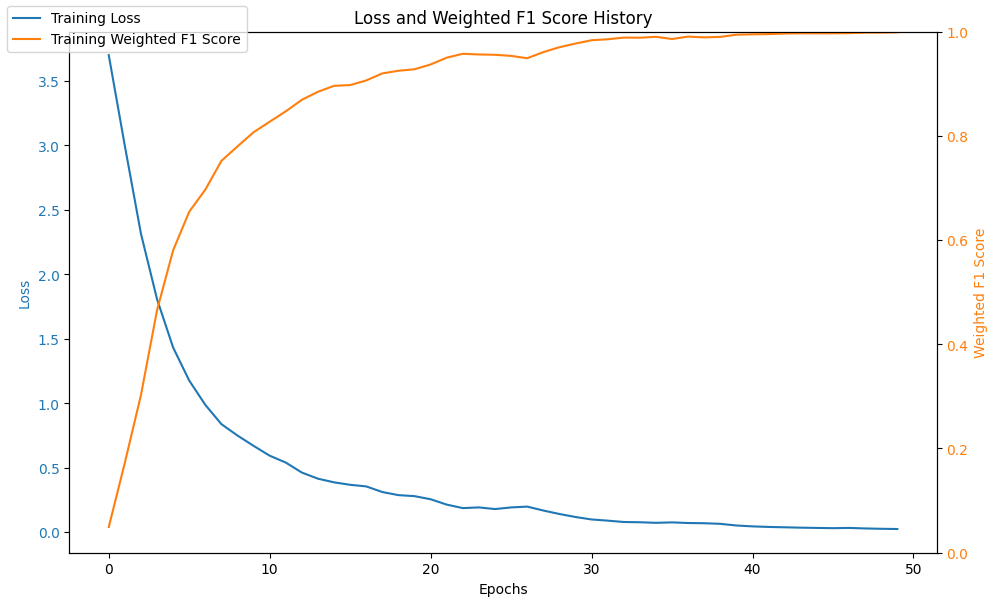

Accuracy: 0.8842
F1 Score: 0.8830
Precision: 0.8878
Recall: 0.8842


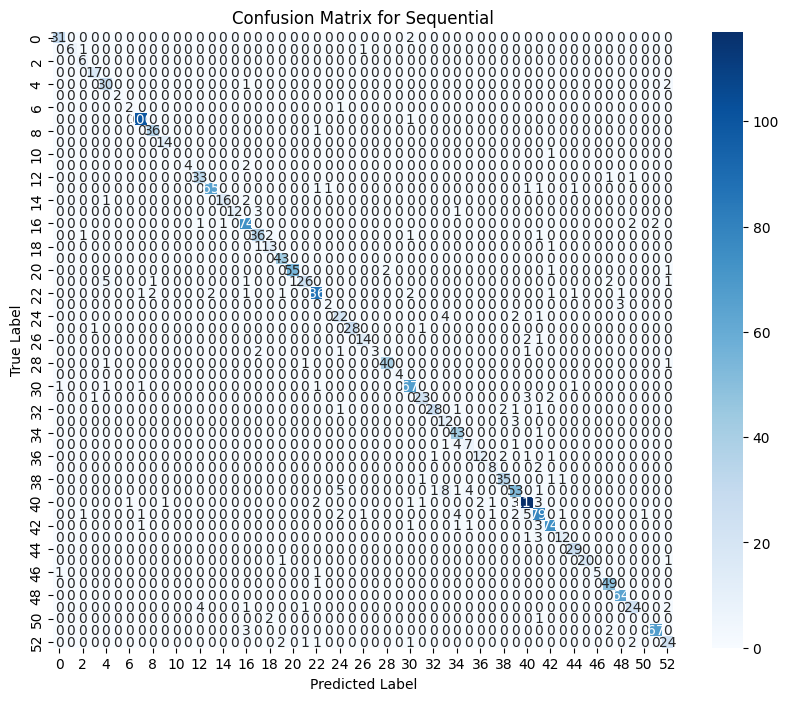

In [12]:
# Encode labels if they are not already encoded
label_encoder = LabelEncoder()
y_train_encoded = to_categorical(label_encoder.fit_transform(y_train))
y_test_encoded = to_categorical(label_encoder.transform(y_test))

# Reshape data for LSTM
X_train_lstm = X_train.reshape(X_train.shape[0], seq_len, -1)  # Flattening spatial dimensions and channels
X_test_lstm = X_test.reshape(X_test.shape[0], seq_len, -1)

# Create CNN model
num_classes = y_train_encoded.shape[1]
model = create_lstm_model((seq_len, X_train_lstm.shape[2]), num_classes)
fit_params = {
    'epochs': 50,
    'batch_size': 512
}

# Evaluate the CNN model
display(HTML("<h1>Evaluating LSTM Model:</h1>"))
evaluate_model(model=model, 
               model_type='keras',
               X_train=X_train_lstm, 
               y_train=y_train_encoded, 
               X_test=X_test_lstm, 
               y_test=y_test_encoded, 
               fit_params=fit_params)

# CNN-LSTM

Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.0643 - f1_score: 0.0317 - loss: 3.6993
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.2958 - f1_score: 0.2272 - loss: 2.5990
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4411 - f1_score: 0.3798 - loss: 1.9544
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5677 - f1_score: 0.5184 - loss: 1.5167
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6210 - f1_score: 0.5754 - loss: 1.2781
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6846 - f1_score: 0.6497 - loss: 1.0604
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7193 - f1_score: 0.6906 - loss: 0.9243
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7563 - f1_score: 0.7356 - loss: 0.8247
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8029 - f1_score: 0.7844 - loss: 0.6656
Epoch 10/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 

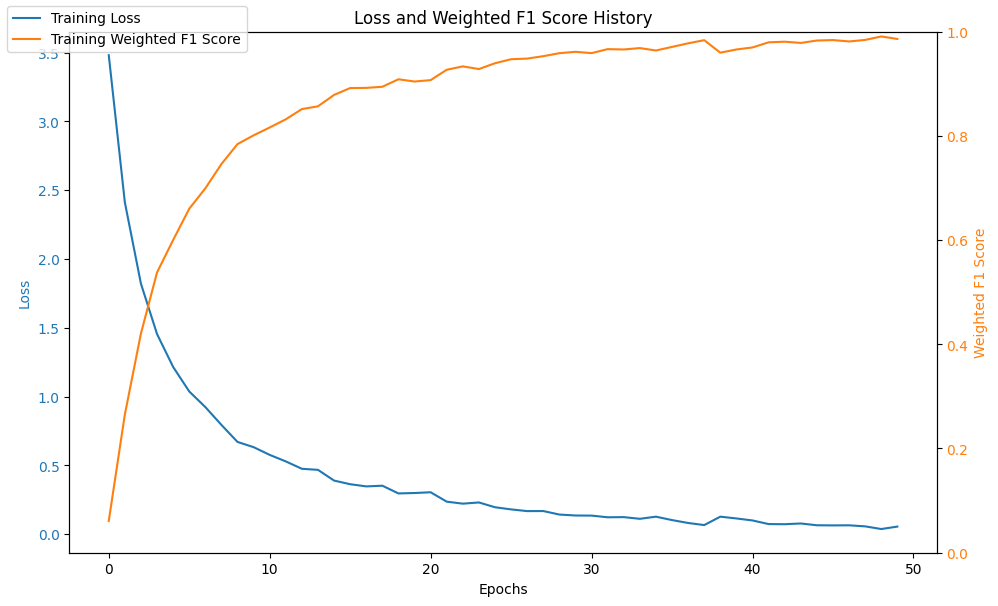

Accuracy: 0.9048
F1 Score: 0.9051
Precision: 0.9108
Recall: 0.9048


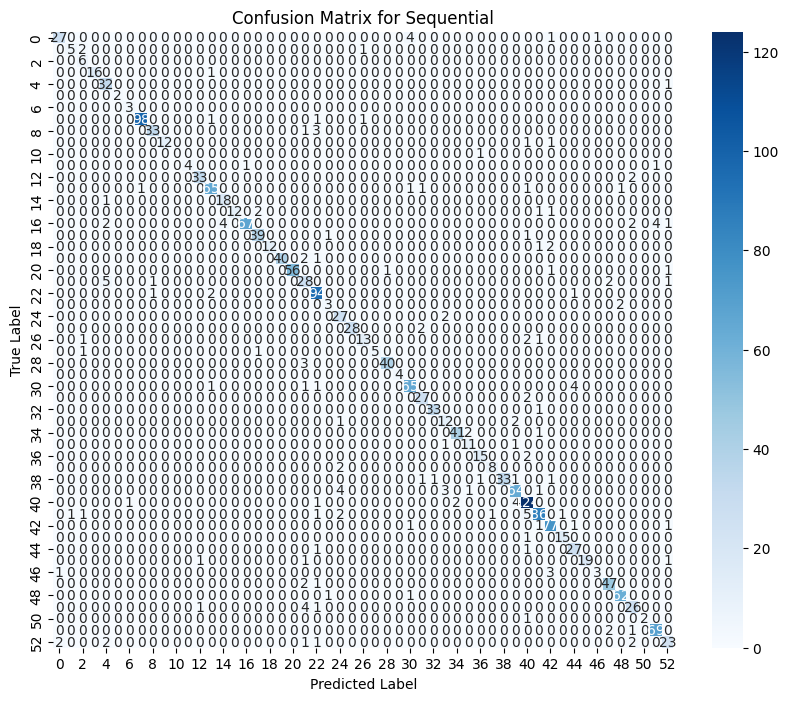

In [16]:
# Encode labels if they are not already encoded
label_encoder = LabelEncoder()
y_train_encoded = to_categorical(label_encoder.fit_transform(y_train))
y_test_encoded = to_categorical(label_encoder.transform(y_test))

# Create model
num_classes = y_train_encoded.shape[1]
model = create_combined_cnn_lstm_model((seq_len, 8, 8, 12), num_classes)
fit_params = {
    'epochs': 50,
    'batch_size': 128
}

# Evaluate the model
display(HTML("<h1>Evaluating CNN-LSTM Model:</h1>"))
evaluate_model(model=model, 
               model_type='keras',
               X_train=X_train, 
               y_train=y_train_encoded, 
               X_test=X_test, 
               y_test=y_test_encoded, 
               fit_params=fit_params)

# CNN-LSTM-Attention

Epoch 1/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.0765 - f1_score: 0.0569 - loss: 3.6072
Epoch 2/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.3525 - f1_score: 0.2986 - loss: 2.2636
Epoch 3/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.5278 - f1_score: 0.4853 - loss: 1.5954
Epoch 4/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.6369 - f1_score: 0.6068 - loss: 1.2155
Epoch 5/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.7022 - f1_score: 0.6822 - loss: 0.9845
Epoch 6/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.7548 - f1_score: 0.7377 - loss: 0.8259
Epoch 7/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.7521 - f1_score: 0.7363 - loss: 0.8021
Epoch 8/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.7885 - f1_score: 0.7758 - loss: 0.6994
Epoch 9/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.7988 - f1_score: 0.7882 - loss: 0.6458
Epoch 10/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 6s 27

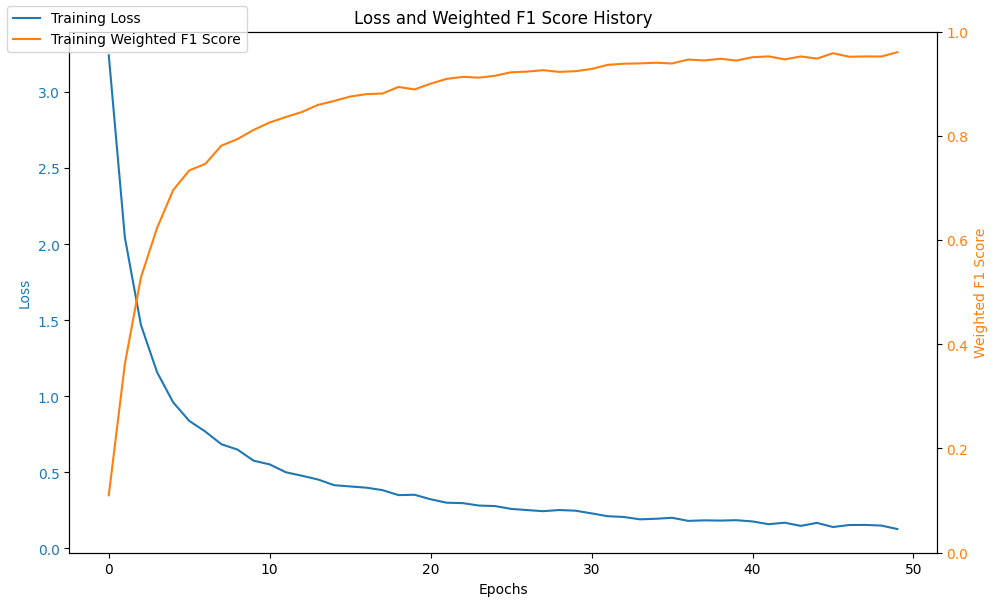

Accuracy: 0.9376
F1 Score: 0.9370
Precision: 0.9412
Recall: 0.9376


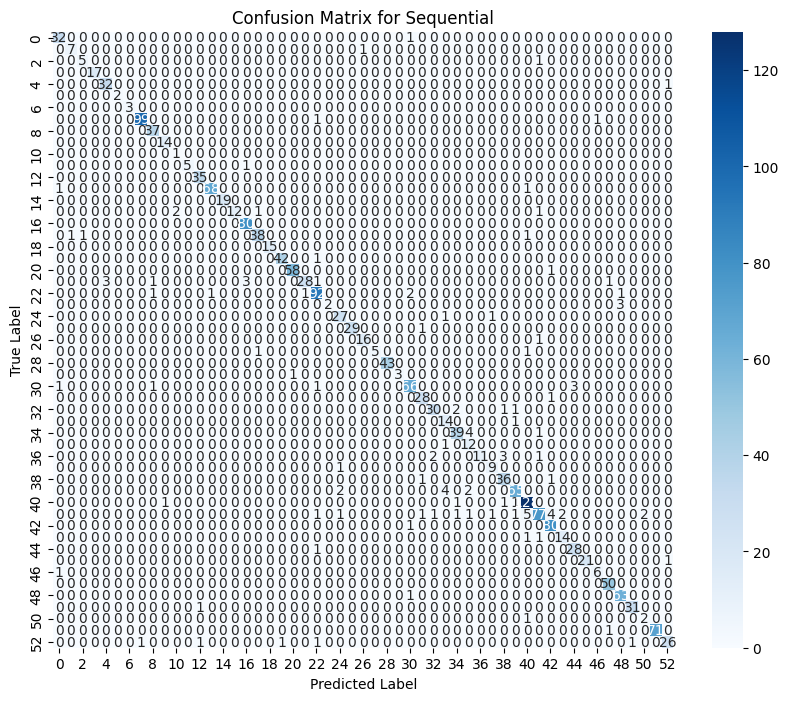

In [15]:
# Encode labels if they are not already encoded
label_encoder = LabelEncoder()
y_train_encoded = to_categorical(label_encoder.fit_transform(y_train))
y_test_encoded = to_categorical(label_encoder.transform(y_test))

# Create model
num_classes = y_train_encoded.shape[1]
model = create_combined_cnn_lstm_with_attention((seq_len, 8, 8, 12), num_classes, seq_len)
fit_params = {
    'epochs': 50,
    'batch_size': 32
}

# Evaluate the CNN model
display(HTML("<h1>Evaluating CNN-LSTM-Attention Model:</h1>"))
evaluate_model(model=model, 
               model_type='keras',
               X_train=X_train, 
               y_train=y_train_encoded, 
               X_test=X_test, 
               y_test=y_test_encoded, 
               fit_params=fit_params)